<a href="https://colab.research.google.com/github/jayavasanth27/house-price-prediction/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving train.csv (1).zip to train.csv (1).zip

📊 Linear Regression Results:
R² Score: 0.7962
MAE: 24617.4
RMSE: 39536.51

📊 Ridge Regression Results:
R² Score: 0.7962
MAE: 24613.26
RMSE: 39540.77

📊 Lasso Regression Results:
R² Score: 0.7962
MAE: 24617.39
RMSE: 39536.55

📊 Random Forest Results:
R² Score: 0.8881
MAE: 18728.83
RMSE: 29298.14


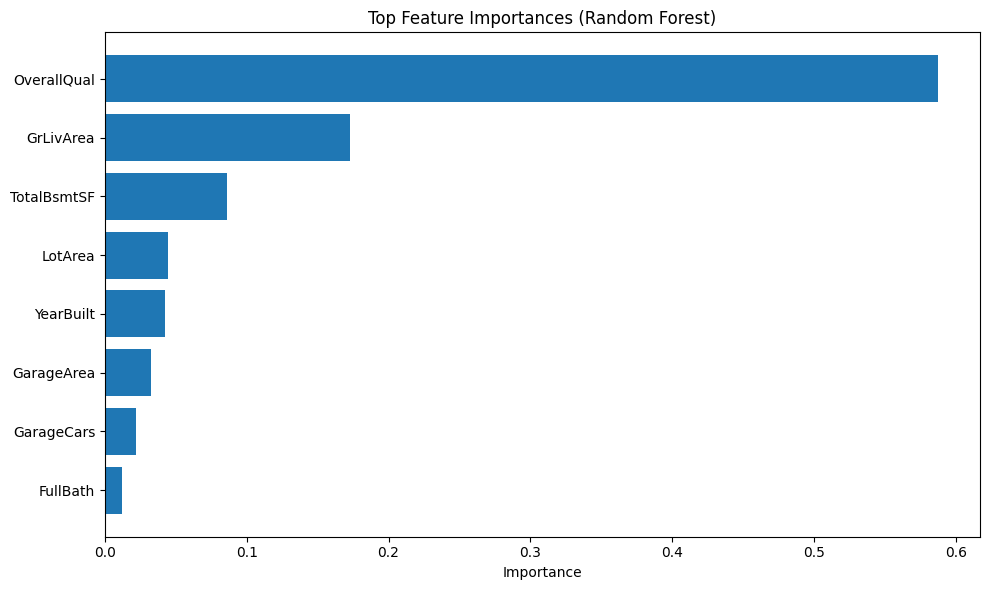

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://85108ee3f02169060a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio 

Created dataset file at: .gradio/flagged/dataset1.csv


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload 'train.csv'


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


zip_file_name = next(iter(uploaded))
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()
df = pd.read_csv("train.csv")


features = [
    'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF',
    'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea'
]
df_model = df[features + ['SalePrice']].dropna()


X = df_model.drop("SalePrice", axis=1)
y = df_model["SalePrice"]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
}


for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n📊 {name} Results:")
    print("R² Score:", round(r2_score(y_test, y_pred), 4))
    print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))


rf = models["Random Forest"]
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


!pip install gradio --quiet


def predict_price(LotArea, OverallQual, YearBuilt, TotalBsmtSF, GrLivArea,
                  FullBath, GarageCars, GarageArea):

    input_data = pd.DataFrame([[
        LotArea, OverallQual, YearBuilt, TotalBsmtSF, GrLivArea,
        FullBath, GarageCars, GarageArea
    ]], columns=[
        'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
        'FullBath', 'GarageCars', 'GarageArea'
    ])

    input_scaled = scaler.transform(input_data)
    prediction = rf.predict(input_scaled)[0]
    return f"Predicted Sale Price: ₹{int(prediction):,}"

import gradio as gr

gr_interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Lot Area (sq ft)", value=7000),
        gr.Slider(1, 10, value=5, step=1, label="Overall Quality (1-10)"),
        gr.Number(label="Year Built", value=2000),
        gr.Number(label="Total Basement SF", value=800),
        gr.Number(label="Above Ground Living Area (GrLivArea)", value=1500),
        gr.Slider(1, 3, step=1, label="Full Bathrooms", value=2),
        gr.Slider(0, 4, step=1, label="Garage Cars", value=2),
        gr.Number(label="Garage Area (sq ft)", value=500)
    ],
    outputs="text",
    title="🏠 House Price Prediction",
    description="Enter property details below to predict the sale price."
)


gr_interface.launch(debug=True)